In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")

### Load data

In [2]:
dataframe = pd.read_csv("data/bodyfat.csv")
dataframe.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


### clean data

In [3]:
dataframe.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

outliers check

### split train and test

In [4]:
from sklearn.model_selection import train_test_split

Train_set, test_set = train_test_split(dataframe, test_size = 0.2, random_state= 42)

In [5]:
eda_df = Train_set.copy()
eda_df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
136,1.0491,21.8,39,166.75,70.75,37.0,92.9,86.1,95.6,58.8,36.1,22.4,32.7,28.3,17.1
55,1.0473,22.6,54,198.00,72.00,39.9,107.6,100.0,99.6,57.2,38.0,22.0,35.9,30.2,18.9
204,1.0209,34.8,44,223.00,69.75,40.9,121.6,113.9,107.1,63.5,40.3,21.8,34.8,30.7,17.4
216,1.0678,13.6,51,149.25,69.75,34.8,92.8,81.1,96.3,53.8,36.5,21.5,31.3,26.3,17.8
147,1.0322,29.6,25,206.50,69.75,40.9,110.9,100.5,106.2,68.4,40.8,24.6,33.3,29.7,18.4


### Exploratory analisys

#### clean data

#### graph functions

In [6]:
def distplot(data_column):
    graph = sns.distplot(data_column,hist=True,kde=True,hist_kws={'linewidth':3})

def pie_graph(data,title,values):
    labels = data[values].value_counts().index
    values = data[values].value_counts()
    fig = go.Figure(data=(go.Pie(labels=labels,values=values)))
    fig.update_layout(title_text = title)
    fig.show()
    
def countplot_bar(df,x,hue,title):
    fig = sns.countplot(data=df,x = x,hue= hue)
    fig.set_title(title)

def reg_plot(x,y,hue,df):
    sns.lmplot(x=x,y=y,hue=hue,data=df, markers=['o','x'],palette='Set1')

array([[<AxesSubplot:title={'center':'Density'}>,
        <AxesSubplot:title={'center':'BodyFat'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Weight'}>],
       [<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Neck'}>,
        <AxesSubplot:title={'center':'Chest'}>,
        <AxesSubplot:title={'center':'Abdomen'}>],
       [<AxesSubplot:title={'center':'Hip'}>,
        <AxesSubplot:title={'center':'Thigh'}>,
        <AxesSubplot:title={'center':'Knee'}>,
        <AxesSubplot:title={'center':'Ankle'}>],
       [<AxesSubplot:title={'center':'Biceps'}>,
        <AxesSubplot:title={'center':'Forearm'}>,
        <AxesSubplot:title={'center':'Wrist'}>, <AxesSubplot:>]],
      dtype=object)

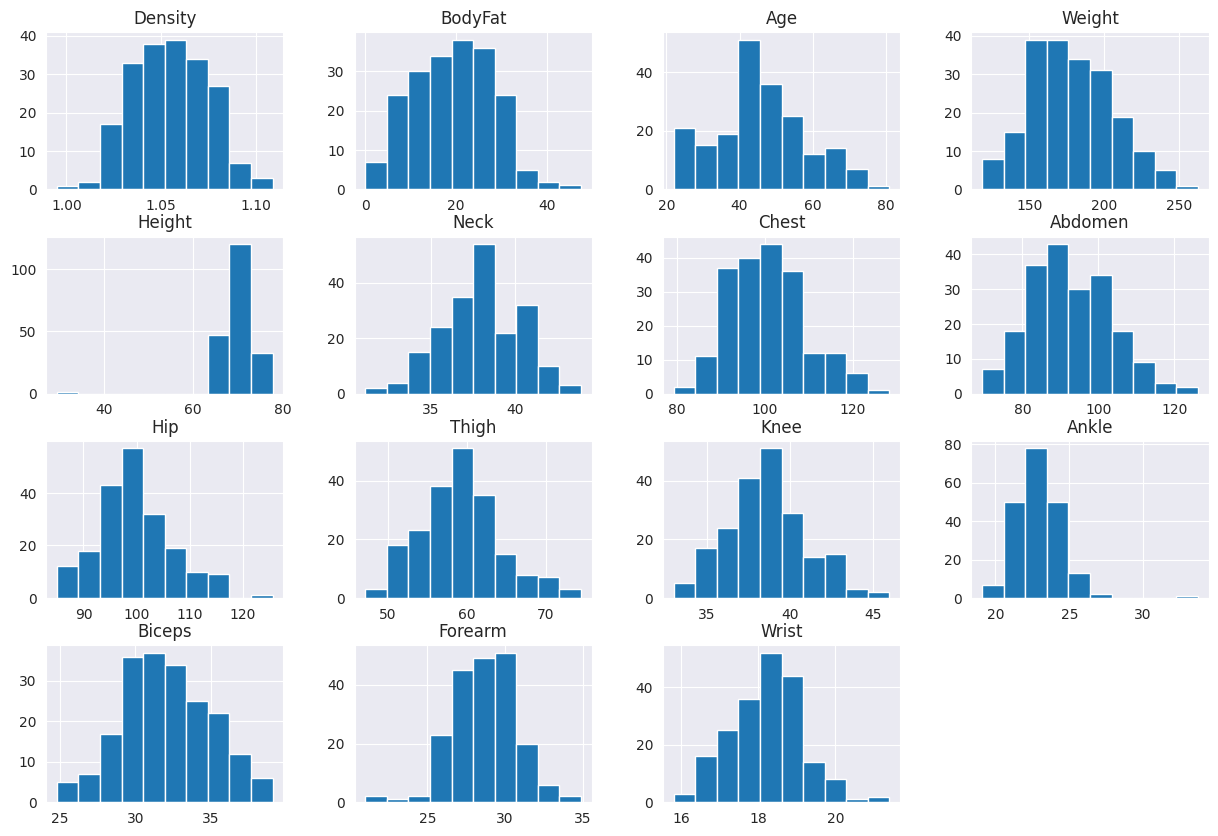

In [7]:
eda_df.hist( figsize=(15,10))

#### Correlations

In [8]:
corr_mx = eda_df.corr()
corr_mx.sort_values(by = "BodyFat",ascending= True)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
Density,1.000000,-0.985894,-0.274309,-0.615886,0.102799,-0.496077,-0.688427,-0.814688,-0.632005,-0.552753,-0.489216,-0.305234,-0.507310,-0.366107,-0.344098
Height,0.102799,-0.093443,-0.170607,0.296816,1.000000,0.237257,0.116856,0.067321,0.150688,0.135038,0.272116,0.249248,0.210687,0.236495,0.321139
Age,-0.274309,0.290705,1.000000,-0.025582,-0.170607,0.101012,0.180569,0.226681,-0.060425,-0.222490,0.017355,-0.063025,-0.058316,-0.106092,0.212025
Ankle,-0.305234,0.306626,-0.063025,0.627578,0.249248,0.457746,0.483527,0.465902,0.567818,0.550392,0.629094,1.000000,0.483457,0.483203,0.598710
Wrist,-0.344098,0.369046,0.212025,0.728487,0.321139,0.722597,0.654766,0.619259,0.633651,0.539376,0.671499,0.598710,0.605493,0.600409,1.000000
Forearm,-0.366107,0.377965,-0.106092,0.692103,0.236495,0.685107,0.611394,0.542411,0.595193,0.595877,0.576765,0.483203,0.713603,1.000000,0.600409
Knee,-0.489216,0.504759,0.017355,0.840634,0.272116,0.632395,0.693005,0.713066,0.811079,0.781609,1.000000,0.629094,0.662614,0.576765,0.671499
Biceps,-0.507310,0.515445,-0.058316,0.793921,0.210687,0.711359,0.712061,0.676457,0.728958,0.738102,0.662614,0.483457,1.000000,0.713603,0.605493
Neck,-0.496077,0.517152,0.101012,0.803464,0.237257,1.000000,0.779460,0.736493,0.699682,0.665856,0.632395,0.457746,0.711359,0.685107,0.722597
Thigh,-0.552753,0.560137,-0.222490,0.854059,0.135038,0.665856,0.707080,0.742790,0.882811,1.000000,0.781609,0.550392,0.738102,0.595877,0.539376


#### No correlations:
- Height:      
 -- Try to change Height column for BMI

#### Very Low correlations:
- None

#### Low correlations:
- Age
- Ankle
- Wrist
- Forearm

#### Moderate correlations:

- Knee
- Biceps
- Neck
- Thigh

#### High correlations:
- Weight
- Hip
- Chest

#### Very High correlations:

- Abdomen

<AxesSubplot:>

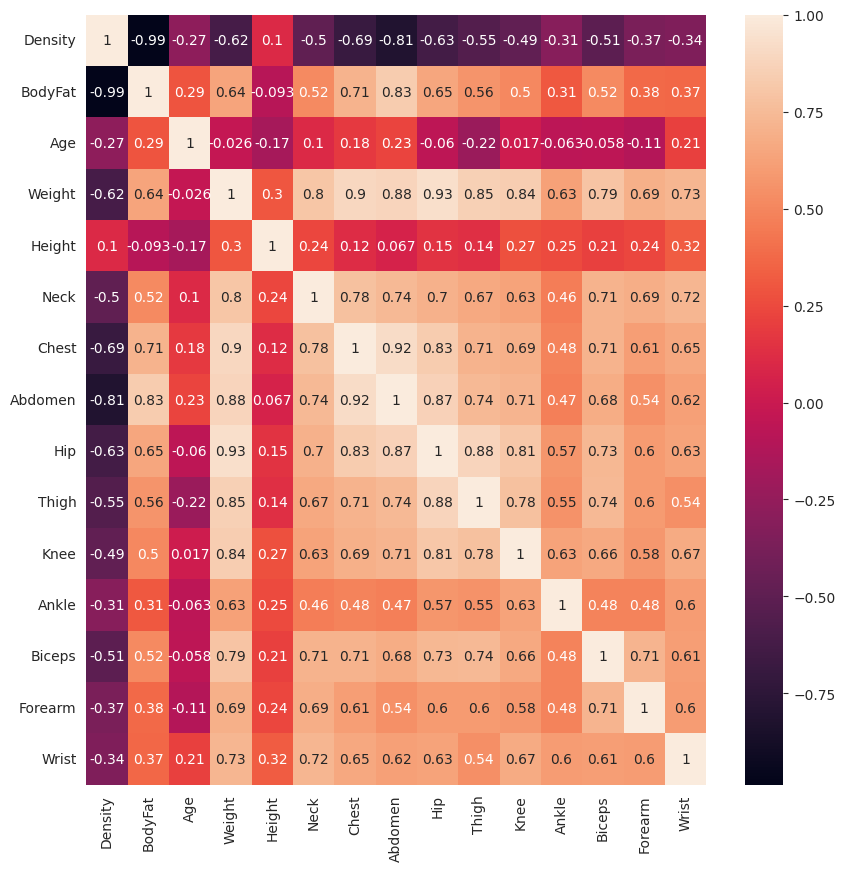

In [9]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(corr_mx, annot=True)

#### Transform and adding new atributtes

transform libs to kg

In [10]:
def libs_to_kg(data):
    return data * 0.45359237

eda_df["Weight"] = eda_df["Weight"].apply(libs_to_kg) 
eda_df

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
136,1.0491,21.8,39,75.636528,70.75,37.0,92.9,86.1,95.6,58.8,36.1,22.4,32.7,28.3,17.1
55,1.0473,22.6,54,89.811289,72.00,39.9,107.6,100.0,99.6,57.2,38.0,22.0,35.9,30.2,18.9
204,1.0209,34.8,44,101.151099,69.75,40.9,121.6,113.9,107.1,63.5,40.3,21.8,34.8,30.7,17.4
216,1.0678,13.6,51,67.698661,69.75,34.8,92.8,81.1,96.3,53.8,36.5,21.5,31.3,26.3,17.8
147,1.0322,29.6,25,93.666824,69.75,40.9,110.9,100.5,106.2,68.4,40.8,24.6,33.3,29.7,18.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1.0547,19.3,43,90.831872,73.50,38.6,105.2,102.8,103.6,61.2,39.3,23.5,30.5,28.5,18.1
14,1.0484,22.1,35,85.161967,69.50,40.5,101.3,96.4,100.1,69.0,39.0,23.1,36.1,30.5,18.2
92,1.0795,8.5,47,74.956139,70.50,37.5,97.2,83.1,95.4,56.9,38.3,22.1,30.1,28.2,18.4
179,1.0603,16.9,39,106.480809,74.50,42.8,109.5,104.5,109.9,69.5,43.1,25.8,39.1,32.5,19.9


transform height inchs to cm

In [11]:
def inchs_to_cm(data):
    return (data * 2.54) / 100

eda_df["Height"] = eda_df["Height"].apply(inchs_to_cm)
eda_df

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
136,1.0491,21.8,39,75.636528,1.79705,37.0,92.9,86.1,95.6,58.8,36.1,22.4,32.7,28.3,17.1
55,1.0473,22.6,54,89.811289,1.82880,39.9,107.6,100.0,99.6,57.2,38.0,22.0,35.9,30.2,18.9
204,1.0209,34.8,44,101.151099,1.77165,40.9,121.6,113.9,107.1,63.5,40.3,21.8,34.8,30.7,17.4
216,1.0678,13.6,51,67.698661,1.77165,34.8,92.8,81.1,96.3,53.8,36.5,21.5,31.3,26.3,17.8
147,1.0322,29.6,25,93.666824,1.77165,40.9,110.9,100.5,106.2,68.4,40.8,24.6,33.3,29.7,18.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1.0547,19.3,43,90.831872,1.86690,38.6,105.2,102.8,103.6,61.2,39.3,23.5,30.5,28.5,18.1
14,1.0484,22.1,35,85.161967,1.76530,40.5,101.3,96.4,100.1,69.0,39.0,23.1,36.1,30.5,18.2
92,1.0795,8.5,47,74.956139,1.79070,37.5,97.2,83.1,95.4,56.9,38.3,22.1,30.1,28.2,18.4
179,1.0603,16.9,39,106.480809,1.89230,42.8,109.5,104.5,109.9,69.5,43.1,25.8,39.1,32.5,19.9


Adding imc to replace height column

In [12]:
eda_df["BMI"] = eda_df["Weight"] / (eda_df["Height"] ** 2)
eda_df 

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
136,1.0491,21.8,39,75.636528,1.79705,37.0,92.9,86.1,95.6,58.8,36.1,22.4,32.7,28.3,17.1,23.421314
55,1.0473,22.6,54,89.811289,1.82880,39.9,107.6,100.0,99.6,57.2,38.0,22.0,35.9,30.2,18.9,26.853352
204,1.0209,34.8,44,101.151099,1.77165,40.9,121.6,113.9,107.1,63.5,40.3,21.8,34.8,30.7,17.4,32.226619
216,1.0678,13.6,51,67.698661,1.77165,34.8,92.8,81.1,96.3,53.8,36.5,21.5,31.3,26.3,17.8,21.568713
147,1.0322,29.6,25,93.666824,1.77165,40.9,110.9,100.5,106.2,68.4,40.8,24.6,33.3,29.7,18.4,29.842138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1.0547,19.3,43,90.831872,1.86690,38.6,105.2,102.8,103.6,61.2,39.3,23.5,30.5,28.5,18.1,26.061305
14,1.0484,22.1,35,85.161967,1.76530,40.5,101.3,96.4,100.1,69.0,39.0,23.1,36.1,30.5,18.2,27.328050
92,1.0795,8.5,47,74.956139,1.79070,37.5,97.2,83.1,95.4,56.9,38.3,22.1,30.1,28.2,18.4,23.375534
179,1.0603,16.9,39,106.480809,1.89230,42.8,109.5,104.5,109.9,69.5,43.1,25.8,39.1,32.5,19.9,29.736604


In [13]:
corr = eda_df.corrwith(eda_df["BMI"])
corr

Density   -0.347215
BodyFat    0.354484
Age        0.032574
Weight     0.352676
Height    -0.684417
Neck       0.214758
Chest      0.346847
Abdomen    0.379604
Hip        0.436895
Thigh      0.403538
Knee       0.330691
Ankle      0.195550
Biceps     0.273559
Forearm    0.202850
Wrist      0.147290
BMI        1.000000
dtype: float64

The correlation of BMI feature with BodyFat is higher than the feature Height

## Conclusions: 


- Body parts where fat accumulates are good indicators of body fat percentage

- The abdomen is the part of the body that most correlates with the percentage of body fat

- The abdomen has a strong correlation with other parts of the body where fat accumulates, thus indicating body proportionality and a relationship between fat accumulation and these other parts.

# Train

In [14]:
selected_features = ["Age","Weight","Height","Neck","Chest","Abdomen","Hip","Thigh","Knee","Ankle","Biceps","Forearm","Wrist"]
X_train = Train_set[selected_features]
y_train = Train_set[["BodyFat"]]

In [15]:
X_train.head()

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
136,39,166.75,70.75,37.0,92.9,86.1,95.6,58.8,36.1,22.4,32.7,28.3,17.1
55,54,198.00,72.00,39.9,107.6,100.0,99.6,57.2,38.0,22.0,35.9,30.2,18.9
204,44,223.00,69.75,40.9,121.6,113.9,107.1,63.5,40.3,21.8,34.8,30.7,17.4
216,51,149.25,69.75,34.8,92.8,81.1,96.3,53.8,36.5,21.5,31.3,26.3,17.8
147,25,206.50,69.75,40.9,110.9,100.5,106.2,68.4,40.8,24.6,33.3,29.7,18.4


##### Creating a transformer for the attributes

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin

weight_idx, height_idx, = 1, 2 

class AttributtesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        X[:,weight_idx] = X[:, weight_idx ] * 0.45359237
        X[:, height_idx] = (X[:,height_idx] * 2.54) / 100
        bmi = X[:,weight_idx] / (X[:, height_idx] ** 2)
        return np.c_[X, bmi]


In [17]:
attr_adder = AttributtesAdder()
df_extra_atribbs = attr_adder.transform(X_train.values)

In [18]:
df_extra_atribbs

array([[ 39.        ,  75.6365277 ,   1.79705   , ...,  28.3       ,
         17.1       ,  23.42131427],
       [ 54.        ,  89.81128926,   1.8288    , ...,  30.2       ,
         18.9       ,  26.853352  ],
       [ 44.        , 101.15109851,   1.77165   , ...,  30.7       ,
         17.4       ,  32.22661914],
       ...,
       [ 47.        ,  74.95613914,   1.7907    , ...,  28.2       ,
         18.4       ,  23.37553403],
       [ 39.        , 106.48080886,   1.8923    , ...,  32.5       ,
         19.9       ,  29.73660354],
       [ 41.        ,  78.35808192,   1.80975   , ...,  29.2       ,
         18.4       ,  23.9247069 ]])

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

full_pipeline = Pipeline([('adder_atribs', AttributtesAdder()),('std_scaler',StandardScaler())])
df_prepared = full_pipeline.fit_transform(X_train.values)

In [20]:
X_train

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
136,39,166.75,70.75,37.0,92.9,86.1,95.6,58.8,36.1,22.4,32.7,28.3,17.1
55,54,198.00,72.00,39.9,107.6,100.0,99.6,57.2,38.0,22.0,35.9,30.2,18.9
204,44,223.00,69.75,40.9,121.6,113.9,107.1,63.5,40.3,21.8,34.8,30.7,17.4
216,51,149.25,69.75,34.8,92.8,81.1,96.3,53.8,36.5,21.5,31.3,26.3,17.8
147,25,206.50,69.75,40.9,110.9,100.5,106.2,68.4,40.8,24.6,33.3,29.7,18.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,43,200.25,73.50,38.6,105.2,102.8,103.6,61.2,39.3,23.5,30.5,28.5,18.1
14,35,187.75,69.50,40.5,101.3,96.4,100.1,69.0,39.0,23.1,36.1,30.5,18.2
92,47,165.25,70.50,37.5,97.2,83.1,95.4,56.9,38.3,22.1,30.1,28.2,18.4
179,39,234.75,74.50,42.8,109.5,104.5,109.9,69.5,43.1,25.8,39.1,32.5,19.9


In [21]:
df_prepared

array([[-0.5178915 , -0.40551214,  0.18051324, ..., -0.18799669,
        -1.22043511, -0.24720208],
       [ 0.66412429,  0.71321728,  0.49934593, ...,  0.74806506,
         0.74289714,  0.08066458],
       [-0.12388623,  1.60820082, -0.07455292, ...,  0.99439709,
        -0.89321307,  0.5939792 ],
       ...,
       [ 0.11251693, -0.45921116,  0.1167467 , ..., -0.2372631 ,
         0.19752707, -0.25157552],
       [-0.5178915 ,  2.02884309,  1.13701132, ...,  1.88119243,
         1.83363728,  0.35610504],
       [-0.36028939, -0.19071609,  0.30804631, ...,  0.25540098,
         0.19752707, -0.19911238]])

### Training a baseline model

In [22]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(df_prepared, y_train)

LinearRegression()

In [23]:
some_data = X_train.iloc[:5]
some_labels = y_train.iloc[:5]

some_data = full_pipeline.transform(some_data.values)
print(f"{lin_reg.predict(some_data)} predicted")
print(f"{some_labels} true")

[[17.20148748]
 [24.12902272]
 [35.75599528]
 [11.62780739]
 [22.80626474]] predicted
     BodyFat
136     21.8
55      22.6
204     34.8
216     13.6
147     29.6 true


In [24]:
from sklearn.metrics import mean_squared_error

X_test = test_set.drop(["BodyFat","Density"],axis=1)
y_test = test_set["BodyFat"]

In [25]:
X_test_prepared = full_pipeline.transform(X_test.values)
y_hat = lin_reg.predict(X_test_prepared)

In [26]:
mean_squared_error(y_test,y_hat)

18.57433517827683

In [27]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(df_prepared, y_train)
y_hat = dt_reg.predict(X_test_prepared)

In [28]:
mean_squared_error(y_test,y_hat)

33.523529411764706

In [29]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor()
rf_regressor.fit(df_prepared,y_train)
y_hat = rf_regressor.predict(X_test_prepared)
mean_squared_error(y_test, y_hat)

15.479212960784313

In [30]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'n_estimators':[10,200],'min_samples_split':[1,20]}

rd_search = RandomizedSearchCV(RandomForestRegressor(),param_distributions=param_grid, verbose=3,cv=3)

In [31]:
rd_search.fit(df_prepared, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] END min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 1/3] END min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 2/3] END min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 3/3] END min_samples_split=1, n_estimators=200;, score=nan total time=   0.0s
[CV 1/3] END min_samples_split=20, n_estimators=10;, score=0.662 total time=   0.0s
[CV 2/3] END min_samples_split=20, n_estimators=10;, score=0.571 total time=   0.0s
[CV 3/3] END min_samples_split=20, n_estimators=10;, score=0.612 total time=   0.0s
[CV 1/3] END min_samples_split=20, n_estimators=200;, score=0.635 total time=   0.2s
[CV 2/3] END min_samples_split=20, n_estimators=200;, score=0.601 total time=   0.2s
[CV 3/3] END min_samples_spli

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'min_samples_split': [1, 20],
                                        'n_estimators': [10, 200]},
                   verbose=3)

In [32]:
best_model = rd_search.best_estimator_
y_hat = best_model.predict(X_test_prepared)
mean_squared_error(y_test,y_hat)

15.507549451956953

In [50]:
from sklearn.linear_model import Lasso

lass_reg = Lasso(alpha=0.2)

lass_reg.fit(df_prepared,y_train)

Lasso(alpha=0.2)

In [51]:
y_hat = lass_reg.predict(X_test_prepared)
mean_squared_error(y_test,y_hat)

20.845453905814963

In [90]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {"hidden_layer_sizes":[10,30,50,100,200],"solver":['lbfgs'],"learning_rate_init":[0.0001,0.001,0.01],"max_iter":[200,400,600,800,1000],"tol":[0.00001]}

#grid_search = GridSearchCV(estimator=MLPRegressor(),param_grid=param_grid, verbose=2)
#grid_search.fit(df_prepared, y_train)

#mlp_reg = grid_search.best_estimator_
mlp_reg = MLPRegressor(hidden_layer_sizes= 200, solver="adam", learning_rate_init= 0.00001, max_iter=30000,verbose=1, tol=1e-50)
mlp_reg.fit(df_prepared, y_train)
y_hat = mlp_reg.predict(X_test_prepared)
mean_squared_error(y_test,y_hat)

Iteration 1, loss = 228.87232283
Iteration 2, loss = 228.84504892
Iteration 3, loss = 228.82080264
Iteration 4, loss = 228.79655679
Iteration 5, loss = 228.77312641
Iteration 6, loss = 228.75091770
Iteration 7, loss = 228.72957532
Iteration 8, loss = 228.70968294
Iteration 9, loss = 228.69094010
Iteration 10, loss = 228.67316225
Iteration 11, loss = 228.65506339
Iteration 12, loss = 228.63642056
Iteration 13, loss = 228.61815376
Iteration 14, loss = 228.59951497
Iteration 15, loss = 228.58098391
Iteration 16, loss = 228.56218501
Iteration 17, loss = 228.54300181
Iteration 18, loss = 228.52481009
Iteration 19, loss = 228.50639330
Iteration 20, loss = 228.48715603
Iteration 21, loss = 228.46641607
Iteration 22, loss = 228.44472904
Iteration 23, loss = 228.42420044
Iteration 24, loss = 228.40407863
Iteration 25, loss = 228.38385195
Iteration 26, loss = 228.36453885
Iteration 27, loss = 228.34654255
Iteration 28, loss = 228.32941519
Iteration 29, loss = 228.31241662
Iteration 30, loss = 22

67.39135714209465